In [1]:
import pandas as pd
import numpy as np
import requests
import urllib3
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
activities = 'https://www.strava.com/api/v3/athlete/activities'
auth_url = "https://www.strava.com/oauth/token"

In [3]:
payload = {
    'client_id': "90629",
    'client_secret': 'dac647219a4e276d758fe38ffb52906e4d5144d8', 
    'refresh_token': '04119dc851c6419a8fbc4f0c205f672cbc1a1bc0',
    'grant_type': "refresh_token",
    'f': 'json'}

In [4]:
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']

C:\Users\Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.strava.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [5]:
my_dataset = pd.DataFrame()
empty_page = True
page = 1
while empty_page:
    header = {'Authorization': 'Bearer ' + access_token}
    param = {'per_page': 200, 'page': page}
    page_dataset = requests.get(activities, headers=header, params=param).json()
    my_dataset = pd.concat([my_dataset,pd.DataFrame(page_dataset)], ignore_index = True)
    empty_page = bool(page_dataset)
    if bool(page_dataset):
        print('\n Page:',page)
    else:
        print("\n Stopping")
    page += 1
print("\n {} loaded records!".format(len(my_dataset)))


 Page: 1

 Page: 2

 Stopping

 257 loaded records!


In [8]:
columns = ['start_date',"start_date_local"]

my_dataset[columns] = my_dataset[columns].apply(
    lambda x: pd.to_datetime(x,errors = 'coerce',infer_datetime_format = True))

In [23]:
my_dataset.head(20)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,weekday,performance_run,is_weekdend
0,2,"{'id': 50591613, 'resource_state': 1}",Gripado,5439.1,1582,1593,38.0,Run,Run,3.0,...,8175559539,8175559539,3084534578-1660862032-run.gpx,False,0,0,False,Thursday,True,False
1,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,5219.8,1397,1397,38.0,Run,Run,3.0,...,8175559480,8175559480,3084534578-1660343751-run.gpx,False,0,0,False,Friday,True,False
2,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,5177.7,1610,1613,37.0,Run,Run,NaN,...,8110343205,8110343205,3084534578-1659737957-run.gpx,False,0,0,False,Friday,True,False
3,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,5502.7,1676,1680,40.0,Run,Run,3.0,...,8070511382,8070511382,3084534578-1659396919-run.gpx,False,0,0,False,Monday,True,False
4,2,"{'id': 50591613, 'resource_state': 1}",Caminhada ao entardecer,5950.2,4065,4149,39.0,Walk,Walk,NaN,...,8070511301,8070511301,3084534578-1658791358-walk.gpx,False,0,0,False,Monday,False,False
5,2,"{'id': 50591613, 'resource_state': 1}",Trilha a tarde,862.4,868,936,15.0,Hike,Hike,NaN,...,8000535753,8000535753,3084534578-1658093706-hike.gpx,False,0,0,False,Sunday,False,True
6,2,"{'id': 50591613, 'resource_state': 1}",Trilha a tarde,1019.5,1269,1422,22.0,Hike,Hike,NaN,...,8000535708,8000535708,3084534578-1658087954-hike.gpx,False,0,0,False,Sunday,False,True
7,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,1372.2,421,430,17.0,Run,Run,NaN,...,7974737095,7974737095,3084534578-1658011041-run.gpx,False,0,0,False,Saturday,True,True
8,2,"{'id': 50591613, 'resource_state': 1}",Corrida vespertina,1388.8,397,401,0.0,Run,Run,NaN,...,7974737073,7974737073,3084534578-1658006636-run.gpx,False,0,0,False,Saturday,True,True
9,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,6191.9,1935,1935,37.0,Run,Run,NaN,...,7963093086,7963093086,3084534578-1657838837-run.gpx,False,0,0,False,Thursday,True,False


<AxesSubplot:xlabel='distance', ylabel='average_speed'>

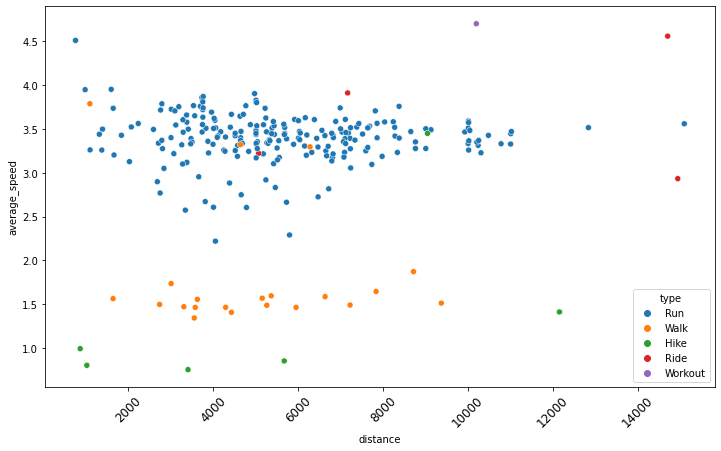

In [32]:
fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')
ax.set_facecolor("xkcd:white")
ax.tick_params(axis='x', labelsize=12, labelrotation = 45)
sns.scatterplot(data = my_dataset, y = "average_speed", x = 'distance',\
                hue = 'type')

At first, turning the data into a useful data.
Lets separete the records that really reflect a real running train performance.
Run records with average speed greater than 3 m/s, it give us a 5:30 min/km pace. Honestly, I remember never running alone below that pace and ever putting clues if the run that is not a performance train. Some runs are just to discover new cities, hang with friends, dislocate or regenerative run.
Lets visualize the name of the records that are being splited away.

In [12]:
my_dataset['name'][(my_dataset['type'] == "Run")\
                   & (my_dataset['average_speed'] <= 3)\
                   | ((my_dataset['type'] != "Run"))]

4                      Caminhada ao entardecer
5                               Trilha a tarde
6                               Trilha a tarde
12                              Trilha matinal
13                     Caminhada ao entardecer
15     Trilha da garganta do diabo - aripuanã 
18                     Caminhada ao entardecer
21                                  Feat Greg 
31                         Pedalada vespertina
40                                    Feat sid
54                        Caminhada vespertina
55                  Corrida ao entardecer feat
57                        Caminhada vespertina
61                              Mit der mütter
63                     Caminhada ao entardecer
74                     Caminhada ao entardecer
75                                 Feat Mayume
76                                Regenerativo
77                     Atividade ao entardecer
78                             Corrida + Oásis
84                     Caminhada ao entardecer
86           

The name of the records listed above always indicate that the record was neither a run or a training. All the runs have "feat" or "test" or "Pós covid" in its names. After a exploratory analysis, as this list shows, It will have objective parameters that fit well the ideia. 

<AxesSubplot:xlabel='distance', ylabel='average_speed'>

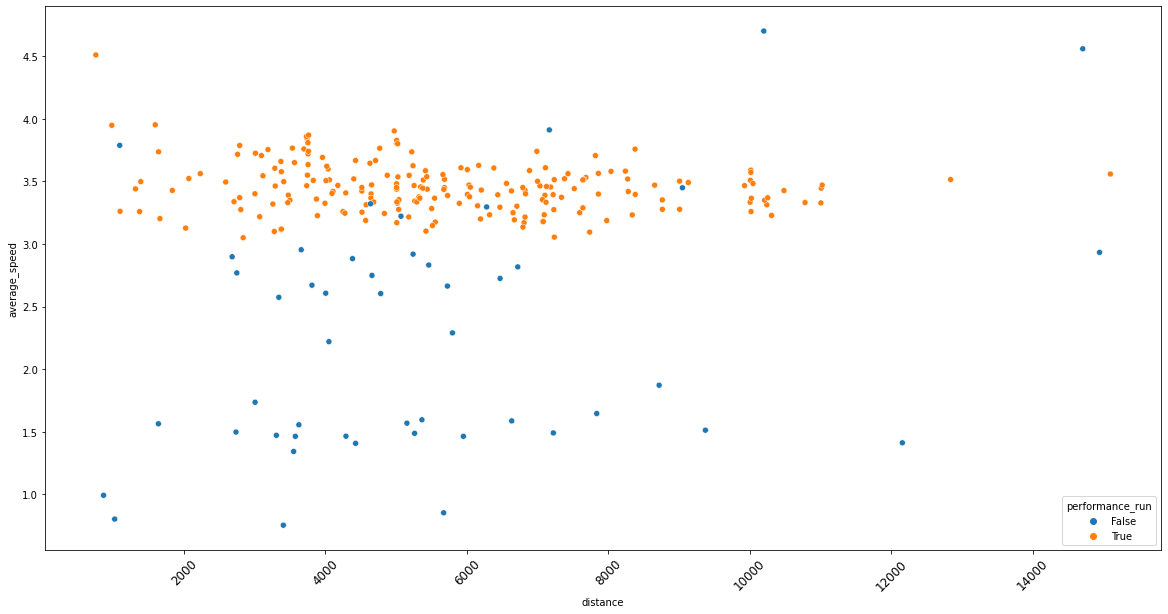

In [18]:
my_dataset['performance_run'] = ((my_dataset['average_speed'] >= 3)\
                                     & (my_dataset['type'] == "Run"))

fig, ax = plt.subplots(figsize=(20, 10), facecolor='white')
ax.set_facecolor("xkcd:white")
ax.tick_params(axis='x', labelsize=12, labelrotation = 45)
sns.scatterplot(data = my_dataset, y = "average_speed", x = 'distance',\
                hue = 'performance_run')

<AxesSubplot:xlabel='distance', ylabel='average_speed'>

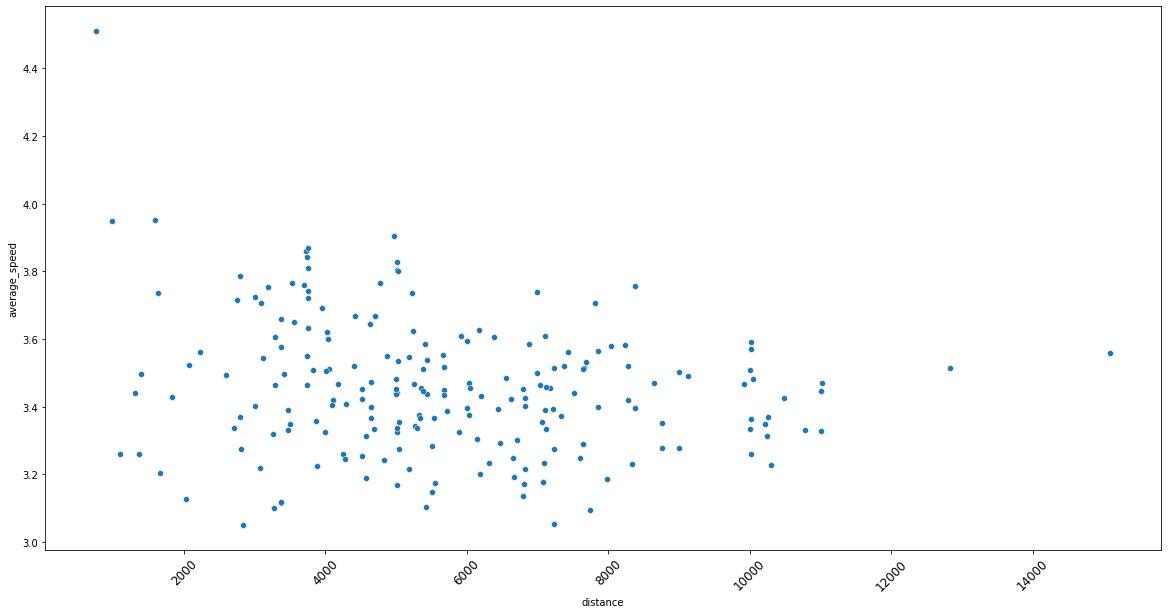

In [19]:
fig, ax = plt.subplots(figsize=(20, 10), facecolor='white')
ax.set_facecolor("xkcd:white")
ax.tick_params(axis='x', labelsize=12, labelrotation = 45)
sns.scatterplot(data = my_dataset[my_dataset['performance_run']], y = "average_speed", x = 'distance')

First hypothesis: Longest runs tend to be in weekdays.


In [27]:
my_dataset['weekday'] = [i.strftime('%A') for i in my_dataset["start_date_local"]]
my_dataset['is_weekdend'] = my_dataset['weekday'].apply(lambda x: x.startswith(('Sat', 'Sun')))

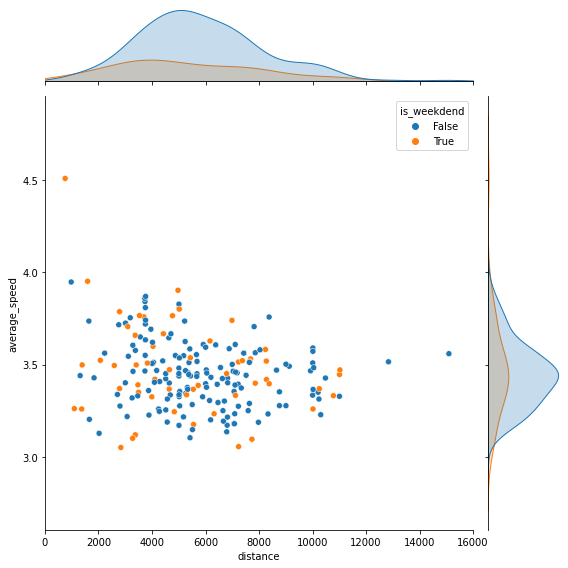

In [42]:
ax.set_facecolor("xkcd:white")
ax.tick_params(axis='x', labelsize=12, labelrotation = 45)
sns.jointplot(data = my_dataset[my_dataset['performance_run']], y = "average_speed", x = 'distance',\
                hue = my_dataset["is_weekdend"], height = 8, xlim= [0, 16000])

Contrary to the hypothesis, It tend to record smaller distances and average speed in weekends.

<AxesSubplot:xlabel='distance', ylabel='average_speed'>

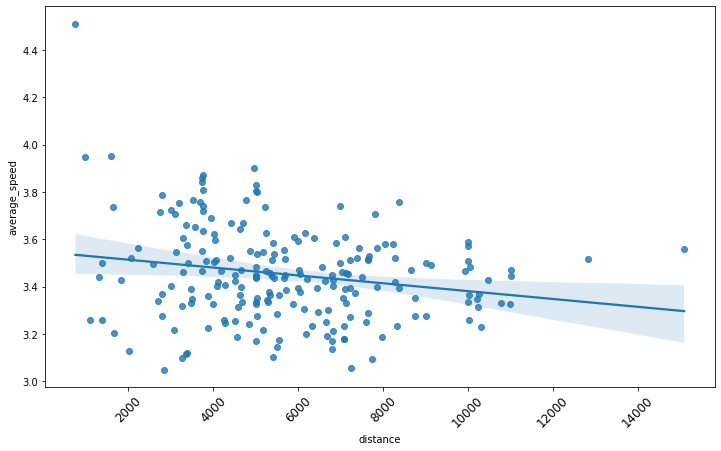

In [44]:
fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')
ax.set_facecolor("xkcd:white")
ax.tick_params(axis='x', labelsize=12, labelrotation = 45)
sns.regplot(data = my_dataset[my_dataset['performance_run']], y = "average_speed", x = 'distance')

In [ ]:
def plotador_de_corrida_mensal(coluna):
    r = my_dataset[["start_date", coluna]][my_dataset['type'] == 'Run']\
    .groupby(my_dataset['start_date'].dt.to_period('M')).mean()
    
    fig, ax = plt.subplots(figsize=(20, 10), facecolor='white')
    ax.set_facecolor("xkcd:white")
    ax.tick_params(axis='x', labelsize=12, labelrotation = 45)
    
    ax = sns.barplot(data = r, x = r.index , y = coluna)
    plt.ylabel("MÉDIA DE " + str(coluna).upper())
    plt.xlabel("")
    
    return ax

C:\Users\Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:ylabel='MÉDIA DE DISTANCE'>

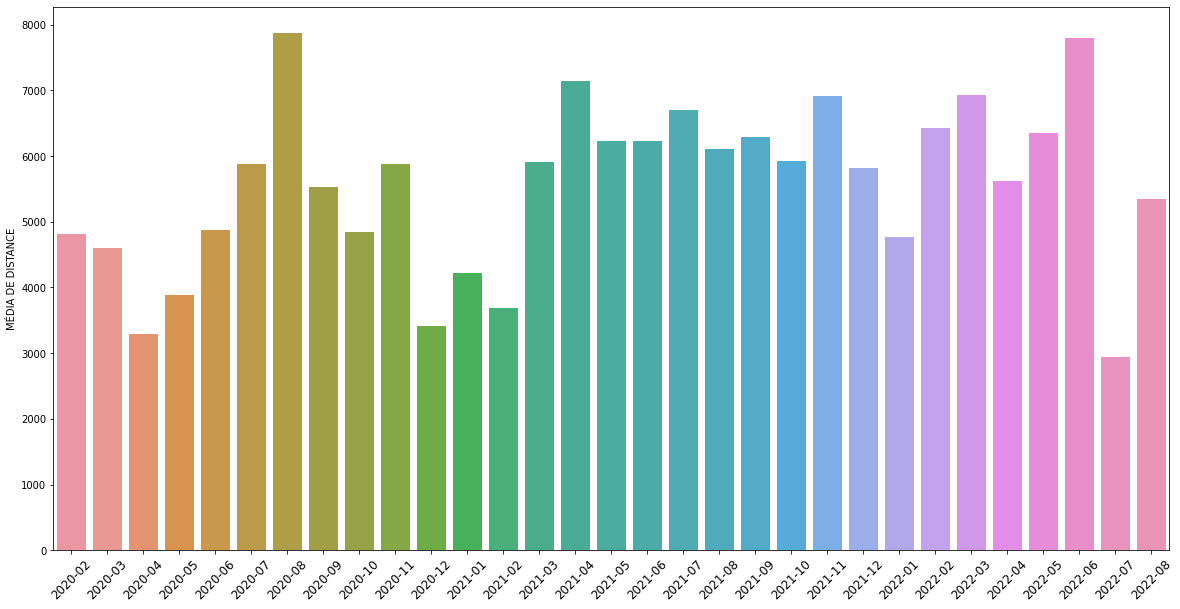

In [14]:
plotador_de_corrida_mensal('distance')

In [52]:
dt.today()

datetime.datetime(2022, 8, 13, 21, 29, 28, 223670)

In [63]:
my_dataset['hour'] = my_dataset['start_date'].dt.strftime("%H").astype('int') - 4
my_dataset['hour'] = my_dataset['start_date'].dt.strftime("%H").astype('int').strftime('%w')


AttributeError: 'Series' object has no attribute 'strftime'

In [14]:
def plotador_de_corrida_hora(coluna):
    r = my_dataset[["start_date", coluna]][my_dataset['type'] == 'Run'].groupby(runs['start_date'].dt.to_period('H')).sum()
    fig, ax = plt.subplots(figsize=(20, 10), facecolor='white')
    ax.set_facecolor("xkcd:white")
    ax.tick_params(axis='x', labelsize=12, labelrotation = 45)
    ax = sns.barplot(data = r, x = r.index , y = coluna)
    plt.ylabel("MÉDIA DE " + str(coluna).upper())
    plt.xlabel("")
    
    return ax

In [61]:
def plotador_de_corrida_hora(coluna):
    r = my_dataset[["start_date", coluna]][my_dataset['type'] == 'Run']
    fig, ax = plt.subplots(figsize=(20, 10), facecolor='white')
    ax.set_facecolor("xkcd:white")
    ax.tick_params(axis='x', labelsize=12, labelrotation = 45)
    ax = sns.distplot(r['start_date'].strftime("%H"))
    plt.ylabel("")
    plt.xlabel("HORA DO DIA")
    
    return ax

AttributeError: 'Series' object has no attribute 'strftime'

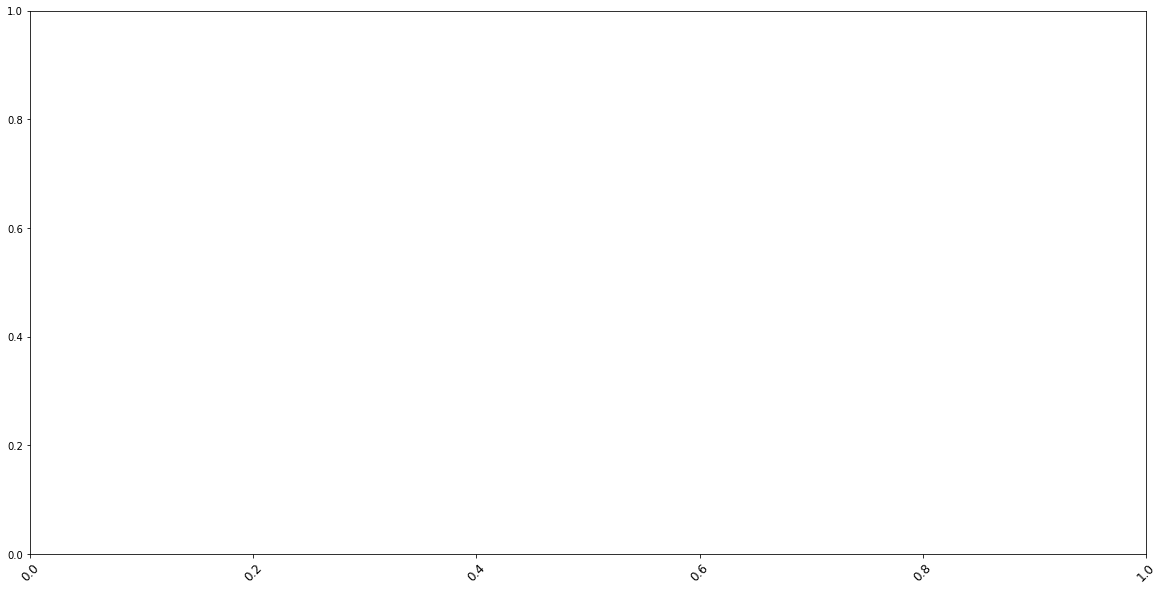

In [62]:
plotador_de_corrida_hora('distance')

In [24]:
def plotador_de_corrida_semanal(coluna):
    r = my_dataset[["start_date", coluna]][my_dataset['type'] == 'Run']
    fig, ax = plt.subplots(figsize=(20, 10), facecolor='white')
    ax.set_facecolor("xkcd:white")
    ax.tick_params(axis='x', labelsize=12, labelrotation = 45)
    ax = sns.distplot(r['start_date'].weekdays())
    plt.ylabel("")
    plt.xlabel("DIA DA SEMANA")
    return ax

AttributeError: 'Series' object has no attribute 'weekdays'

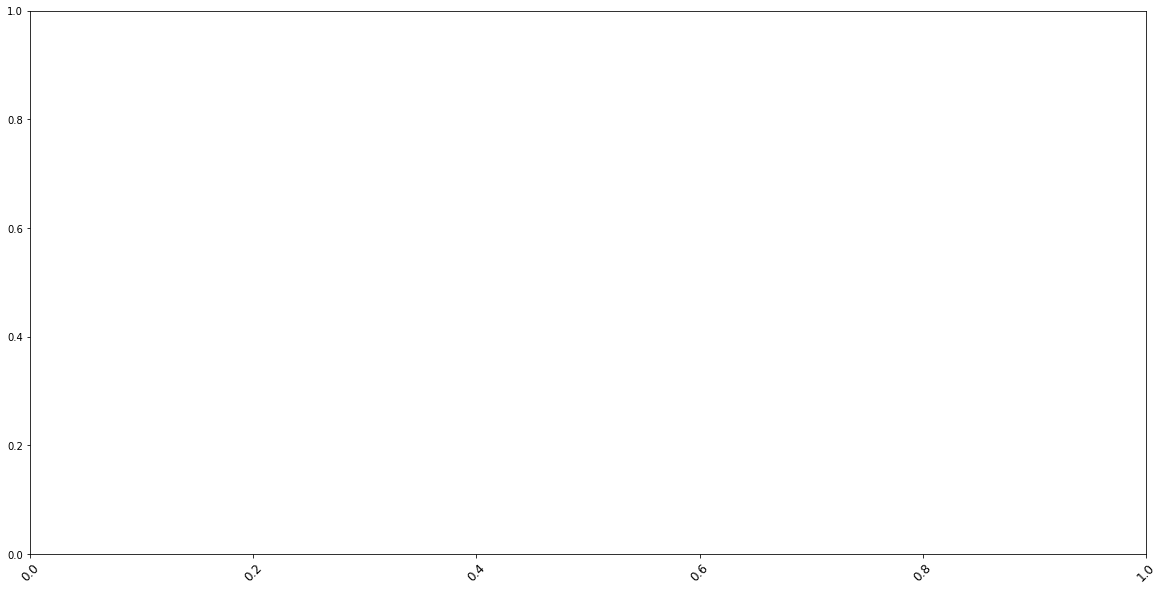

In [25]:
plotador_de_corrida_semanal('distance')